In [219]:
import igraph as ig
import matplotlib.pyplot as plt
import numpy as np

In [220]:
# Number of vertices in the bipartition
n1 = 20
n2 = 30

p1 = 0.8 # probability of an edge between two vertices belonging to the same partition
p2 = 0.1 # probability of an edge between two vertices belonging to different partitions

# Set the seed for reproducibility
np.random.seed(0)

In [221]:
# Generate a square matrix of size n1 x n1 
matrix1 = np.random.choice([0, 1], size=(n1, n1), p=[1-p1, p1])
# Symmetrize the matrix
matrix1 = np.triu(matrix1, 1) + np.triu(matrix1, 1).T

# Generate a square matrix of size n2 x n2
matrix2 = np.random.choice([0, 1], size=(n2, n2), p=[1-p1, p1])
# Symmetrize the matrix
matrix2 = np.triu(matrix2, 1) + np.triu(matrix2, 1).T

# Generate a matrix of size n1 x n2
matrix3 = np.random.choice([0, 1], size=(n1, n2), p=[1-p2, p2])

# Concatenate the matrices
A = np.block([[matrix1, matrix3], [matrix3.T, matrix2]])

print(A)

[[0 1 1 ... 0 0 1]
 [1 0 1 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [1 0 0 ... 0 1 0]]


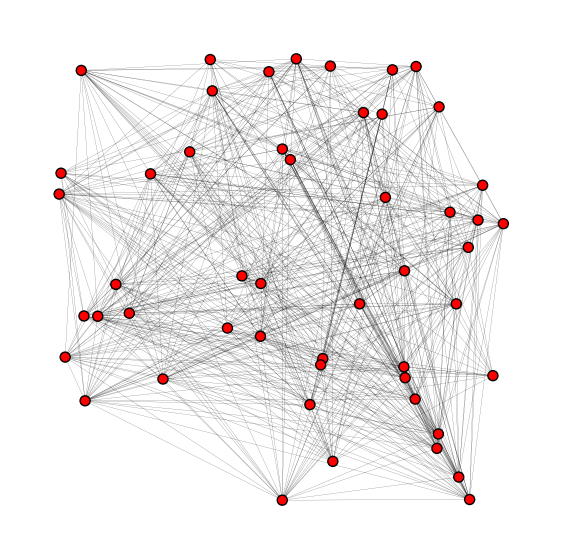

In [222]:
# Generate an undirected graph with the adjacency matrix A
g = ig.Graph(n=n1 + n2, edges=[(i, j) for i, j in zip(*np.where(A)) if i < j])

fig, ax = plt.subplots(figsize=(7, 7))
ig.plot(
    g,
    target=ax,
    vertex_size=10,
    layout=g.layout("random"),
    # vertex_label=range(g.vcount()),
    # vertex_color=["orange" if i < n1 else "green" for i in range(g.vcount())],
    edge_width=[0.1],
    edge_color=["black"]
)

Text(0, 0.5, 'Eigenvalue')

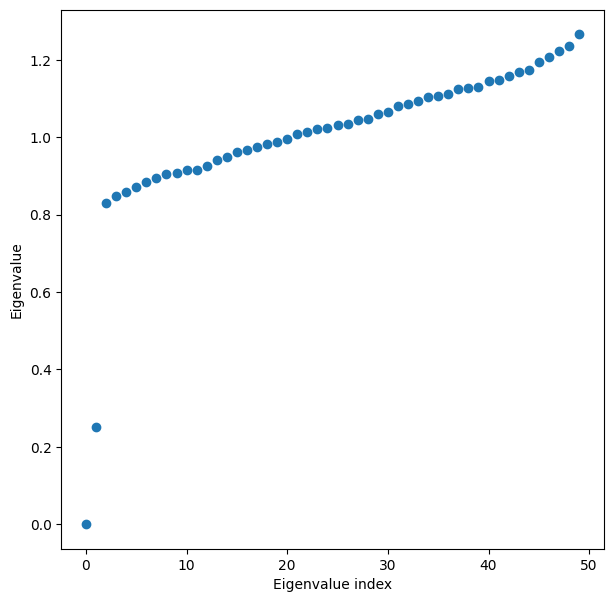

In [223]:
# get the normalized laplacian matrix of the graph
L = g.laplacian(normalized=True)

# get the eigenvalues and eigenvectors of the normalized laplacian matrix
eigenvalues, eigenvectors = np.linalg.eigh(L)

# plot the eigenvalues
fig, ax = plt.subplots(figsize=(7, 7))
ax.plot(np.sort(eigenvalues), 'o')
ax.set_xlabel("Eigenvalue index")
ax.set_ylabel("Eigenvalue")


Text(0, 0.5, 'Coordinate value')

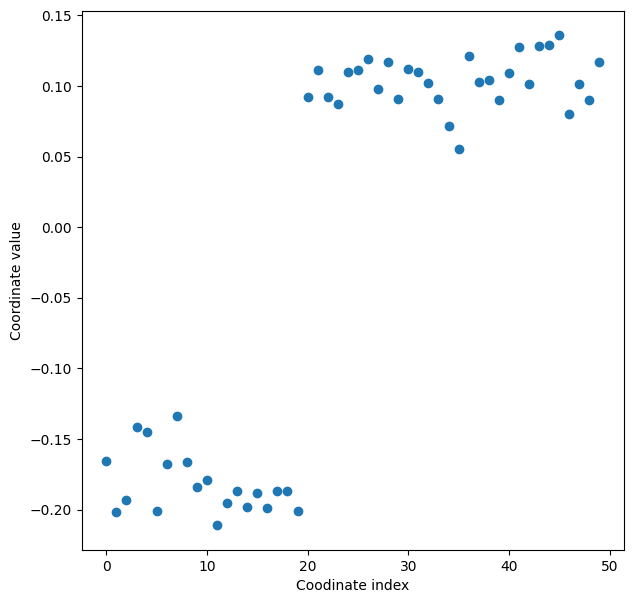

In [224]:
# get the second eigenvectors
v2 = eigenvectors[:, 1]

# plot the second eigenvector v2
fig, ax = plt.subplots(figsize=(7, 7))
ax.plot(v2, 'o')
ax.set_xlabel("Coodinate index")
ax.set_ylabel("Coordinate value")


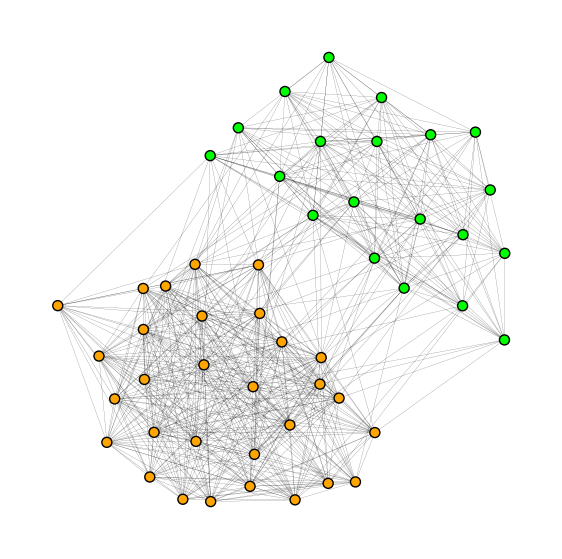

In [225]:
# set cut value
cut = 0

# find the first partition 
part1 = [i for i in range(g.vcount()) if v2[i] < cut]

# find the second partition
part2 = [i for i in range(g.vcount()) if v2[i] >= cut]

fig, ax = plt.subplots(figsize=(7, 7))
ig.plot(
    g,
    target=ax,
    vertex_size=10,
    layout=g.layout("kk"),
    # vertex_label=range(g.vcount()),
    vertex_color=["orange" if cut < v2[i] else "green" for i in range(g.vcount())],
    edge_width=[0.1],
    edge_color=["black"]
)

In [226]:
# count the number of edges with one vertex in part 1 and the other in part 2
cross_edges = sum(
  (edge.source in part1 and edge.target in part2) or 
  (edge.source in part2 and edge.target in part1) for edge in g.es)

# compute the volume of the first partition
vol1 = sum(g.degree(i) for i in part1)

# compute the volume of the second partition
vol2 = sum(g.degree(i) for i in part2)

# compute the conductance
conductance = cross_edges / min(vol1, vol2)

# print the conductance
print(f"Conductance: {conductance}")

Conductance: 0.18181818181818182
